### Simulating From the Null Hypothesis

Load in the data below, and use the exercises to assist with answering the quiz questions below.

**If you get stuck, notice there is a solution notebook available by clicking on the orange jupyter icon in the top left!**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

`1.` If you were interested in studying whether the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative hypotheses be?  Write them in the cell below, and use your answer to answer the first quiz question below.

  H0: Mean_Height_Coffee = Mean_Height_NonCoffee
  
  H1: Mean_Height_Coffee != Mean_Height_NonCoffee

`2.` If you were interested in studying whether the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative hypotheses be?  Write them in the cell below, and use your answer to answer the second quiz question below.

  H0: Mean_Height_Coffee >= Mean_Height_NonCoffee
  
  H1: Mean_Height_Coffee < Mean_Height_NonCoffee  

`3.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.  Use the results of your sampling distribution, to answer the third quiz question below.

In [17]:
diffs,means_coffee,means_noncoffee = [],[],[]
for _ in range(10000):
    bootsamp = full_data.sample(200,replace=True)
    mean_coffee=bootsamp[bootsamp.drinks_coffee]['height'].mean()
    mean_noncoffee=bootsamp[bootsamp.drinks_coffee==False]['height'].mean()
    means_coffee.append(mean_coffee)
    means_noncoffee.append(mean_noncoffee)
    diffs.append(mean_coffee-mean_noncoffee)

In [18]:
np.std(means_coffee)

0.2404927757414119

In [19]:
np.std(means_noncoffee)

0.37594271565095111

In [21]:
np.std(diffs)

0.44756111882440675

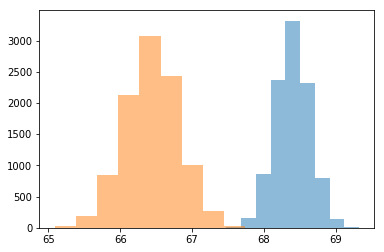

In [22]:
plt.hist(means_coffee, alpha = 0.5);
plt.hist(means_noncoffee, alpha = 0.5); 

`4.` Now, use your observed sampling distribution for the difference in means and [the docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to simulate what you would expect the sampling distribution to be if the null hypothesis is true. You can do this be recentering your distribution at zero. Also, calculate the observed sample mean difference in `sample_data`. Use your solutions to answer the last questions in the quiz below.